In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import pandas as pd
from IPython import display

In [10]:
file = open("psi0.txt", "r")
psi0 = file.read()
file.close()
psi0 = psi0.split(", ")
del psi0[-1]
for i, el in enumerate(psi0):
    psi0[i] = float(el)

N = int(np.sqrt(len(psi0)))

psi0 = np.asarray(psi0)
psi0 = psi0.reshape(N, N)
psi0.shape

(201, 201)

In [11]:
file = open("psi-t.txt", "r")
psi_t = file.read()
file.close()
psi_t = psi_t.split(", ")
del psi_t[-1]

Nt = int(len(psi_t)/N**2)

psi = []
psis = []
counter = 1

for i, el in enumerate(psi_t):
    psi.append(float(psi_t[i]))
    if counter == N**2:
        psi = np.asarray(psi)
        psi = psi.reshape(N, N)
        psis.append(psi)
        psi = []
        counter = 0
    counter += 1

print(len(psis))
print(psis[-1].shape)
    
    



1000
(201, 201)


In [12]:
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)

x, y = np.meshgrid(x, y)
x.shape

(201, 201)

In [13]:
dx = 0.1
L = 10

# Parameters of the double slit.
w = 0.2 # Width of the walls of the double slit.
s = 0.8 # Separation between the edges of the slits.
a = 0.4 # Aperture of the slits.

# Indices that parameterize the double slit in the space of points.

i0 = int(1/(2*dx)*(L-w)) # Left edge.
i1 = int(1/(2*dx)*(L+w)) # Right edgedx
j0 = int(1/(2*dx)*(L+s) + a/dx) # Lower edge of the lower slit.
j1 = int(1/(2*dx)*(L+s))        # Upper edge of the lower slit.
j2 = int(1/(2*dx)*(L-s))        # Lower edge of the upper slit.
j3 = int(1/(2*dx)*(L-s) - a/dx) # Upper edge of the upper slit.



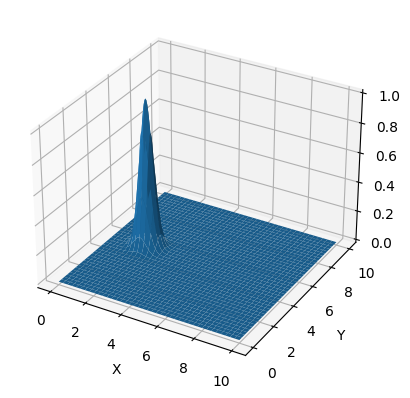

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = ax.plot_surface(x, y, psi0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

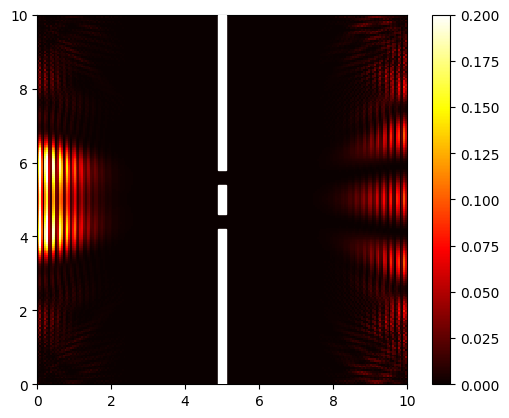

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(0, 10), ylim=(0, 10))

img = ax.imshow(psis[0], extent=[0, 10, 0, 10], cmap=plt.get_cmap("hot"), vmin=0, vmax=0.2, zorder=1, interpolation="none")

wall_bottom = Rectangle((i0*dx,0),     w, j3*dx,      color="w", zorder=50) 
wall_middle = Rectangle((i0*dx,j2*dx), w, (j1-j2)*dx, color="w", zorder=50)
wall_top    = Rectangle((i0*dx,j0*dx), w, j3*dx,      color="w", zorder=50)

ax.add_patch(wall_bottom)
ax.add_patch(wall_middle)
ax.add_patch(wall_top)

def animate(i):
    img.set_data(psis[i])
    img.set_zorder(1)

anim = animation.FuncAnimation(fig, animate, interval=1, frames=np.arange(0,Nt,2), repeat=False, blit=0)

cbar = fig.colorbar(img)

writer = animation.PillowWriter(fps=60)
anim.save("DoubleSlit2D.gif", writer=writer)

plt.show()